## The K-arm Bandit problem ##

(for k = 5)

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
k = 5
n = 2000
M = np.random.normal(size=(n, k)) 
# An array containing k lists each of length n

reward = lambda row, a: M[row, a] + np.random.normal()

In [38]:
# Greedy
q_optimum = np.argmax(M, axis = 1)

In [39]:
# Epsilon greedy
e_greedy = lambda Q, epsilon: np.random.choice(range(5)) if np.random.sample() < epsilon else np.argmax(Q)

In [40]:
# Incremental formula
update_rule = lambda old_estimate, target, step_size: old_estimate + step_size * (target - old_estimate)

In [41]:
Qs = np.zeros(shape=(n, k))
steps = 1000
epsilon = 0.1
 
ratio_est_opt = np.zeros(shape=(n, steps))
rewards_accum = np.zeros(shape=(n, steps))
opt_rewards_accum = np.zeros(shape=(n, steps)) + 1/10**8
    
for i in range(n):
    N = np.zeros(k)
    for t in range(steps):            
        a = e_greedy(Qs[i,:], epsilon)     
        r = reward(i, a)
        N[a] += 1
        Qs[i, a] = update_rule(Qs[i, a], r, 1/N[a])   
        if t > 0:
            rewards_accum[i, t] = rewards_accum[i, t-1] + r
            opt_rewards_accum[i, t] = opt_rewards_accum[i, t-1] + reward(i, q_optimum[i])

avg_rewards_accum = np.mean(rewards_accum, 0)
avg_opt_rewards_accum = np.mean(opt_rewards_accum, 0)
avg_ratio_est_vs_opt = avg_rewards_accum / avg_opt_rewards_accum

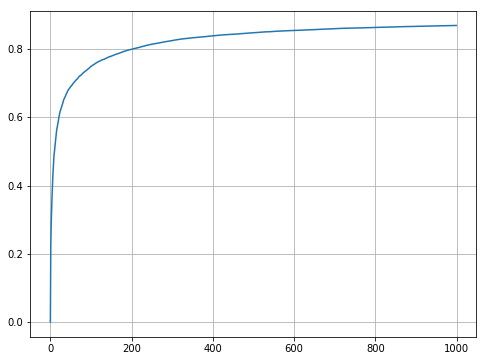

In [44]:
plt.figure(figsize = (8, 6))
plt.plot(avg_ratio_est_vs_opt);
plt.grid()